### link dataset : [disini](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

### Import Library pemrosesan data dan pemodelan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

### Untuk menampilkan Output visualisasi langsung di Jupyter.

In [2]:
%matplotlib inline

### Membaca Dataset

In [3]:
bank_df = pd.read_csv('dataset/bank-additional-full.csv', sep=';', quotechar='"')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Karena dataset menggunakan ";" dalam pemisah bukan "," maka, diperlukan pemisahan kolom dengan karakter tersebut.

### Menampilkan dimensi data DataFrame.

In [4]:
print("Dimensi = ", bank_df.shape)

Dimensi =  (41188, 21)


### Menampilkan Info dari Dataset

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Mengidentifikasi dan menyimpan kolom-kolom numerik dari DataFrame 'bank_df' ke dalam variabel 'numerical_columns'.

In [6]:
numerical_columns = list(bank_df.select_dtypes(include=['int64']).columns.values) + list(bank_df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(bank_df.select_dtypes(include=['object']))
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [7]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### Menampilkan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame 'bank_df'.

In [8]:
bank_df[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Menghitung jumlah data berdasarkan 'y'.





In [9]:
bank_df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


### Menghitung data 'unknown' dalam 'categorical_columns'.





In [10]:
bank_df[
    bank_df[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

### Mengganti 'unknown' dengan NaN dalam 'categorical_columns'.

In [11]:
bank_df[
    bank_df[categorical_columns]=="unknown"
] = np.nan

### Menghitung data 'unknown' dalam 'categorical_columns'.





In [12]:
bank_df[
    bank_df[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

### Menampilkan data dalam kolom-kolom 'categorical_columns' dalam DataFrame 'bank_df'.

In [13]:
bank_df[
    categorical_columns
].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


### Menampilkan nilai unik dari kolom-kolom dalam 'categorical_columns'.

In [14]:
for cat_col in categorical_columns:
    print("Nilai unik untuk kolom ", cat_col.upper())
    print(bank_df[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Nilai unik untuk kolom  MARITAL
['married' 'single' 'divorced' nan]
Nilai unik untuk kolom  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Nilai unik untuk kolom  DEFAULT
['no' nan 'yes']
Nilai unik untuk kolom  HOUSING
['no' 'yes' nan]
Nilai unik untuk kolom  LOAN
['no' 'yes' nan]
Nilai unik untuk kolom  CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom  POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik untuk kolom  Y
['no' 'yes']


### Menampilkan data dalam kolom-kolom 'numerical_columns' dalam DataFrame 'bank_df'.

In [15]:
bank_df[
    numerical_columns
].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Menampilkan nilai unik dari kolom-kolom dalam 'numerical_columns'.

In [16]:
for num_col in numerical_columns:
    print("Nilai unik untuk kolom ", num_col.upper())
    print(bank_df[num_col].unique())
    print('='*30)

Nilai unik untuk kolom  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.7

### Mengganti nilai 999 dengan 0 pada kolom 'pdays' dalam DataFrame 'bank_df'.

In [17]:
bank_df['pdays'].replace(999,0,inplace=True)

### Menampilkan jumlah nilai null atau missing values pada atribut kategori dan atribut numerikal dalam 'bank_df'.

In [18]:
print("Jumlah null values atribut kategori = ",bank_df[categorical_columns].isnull().sum().sum())
print("Jumlah null values atribut numerikal = ",bank_df[numerical_columns].isnull().sum().sum())

Jumlah null values atribut kategori =  12718
Jumlah null values atribut numerikal =  0


### Mengambil subset DataFrame 'bank_df' untuk kolom-kolom kategori dan numerikal.

In [19]:
bank_df_categorical = bank_df[categorical_columns]
bank_df_numerical = bank_df[numerical_columns]
bank_df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [20]:
bank_df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0


### Membuat objek 'imputer_categorical' untuk mengisi nilai yang hilang (missing values) pada atribut kategori dengan strategi 'most_frequent'.

In [21]:
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

### Melakukan permodelan 'imputer_categorical' pada data kategori untuk mengganti nilai yang hilang.

In [22]:
imputer_categorical.fit(bank_df_categorical)

SimpleImputer(strategy='most_frequent')

### Mentransformasikan data kategori 'bank_df_categorical' dengan menggunakan 'imputer_categorical' untuk mengisi nilai yang hilang.

In [23]:
bank_df_categorical = imputer_categorical.transform(bank_df_categorical)

### Mengubah hasil transformasi data kategori 'bank_df_categorical' menjadi DataFrame baru.

In [24]:
bank_df_categorical = pd.DataFrame(bank_df_categorical,columns=categorical_columns)

### Menggabungkan data numerik dan kategori menjadi satu DataFrame baru.

In [25]:
bank_df = pd.concat([bank_df_numerical,bank_df_categorical],axis=1)

### Menampilkan jumlah nilai null (missing values) pada atribut kategori dan numerikal dalam DataFrame.

In [26]:
print("Jumlah null values atribut kategori = ",bank_df[categorical_columns].isnull().sum().sum())
print("Jumlah null missing values atribut numerikal = ",bank_df[numerical_columns].isnull().sum().sum())

Jumlah null values atribut kategori =  0
Jumlah null missing values atribut numerikal =  0


### mengganti nama kolom dataframe

In [27]:
bank_df.rename(columns={
    'job':'pekerjaan',
    'marital':'pernikahan',
    'education':'pendidikan',
    'default':'kredit_default',
    'housing':'pinjaman_rumah',
    'loan':'pinjaman_pribadi',
    'contact':'alat_komunikasi',
    'month':'kontak_terakhir_bulan',
    'day_of_week':'kontak_terakhir_hari',
    'poutcome':'luaran_marketing_sebelumnya',
    'y':'berlangganan_deposito',
    'age':'umur',
    'duration':'kontak_terakhir_berdurasi',
    'campaign':'jumlah_kontak_selama_pemasaran',
    'pdays':'jumlah_hari_berlalu',
    'previous':'jumlah_kontak_sebelum_pemasaran',
    'emp.var.rate':'tingkat_variasi_pekerjaan',
    'cons.price.idx':'indeks_harga_konsumen',
    'cons.conf.idx':'indeks_kepercayaan_konsumen',
    'euribor3m':'tarif_euribor_3bulan',
    'nr.employed':'jumlah_karyawan',
},inplace=True)

### menampilkan top 5 dataframe

In [28]:
bank_df.head()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_hari_berlalu,jumlah_kontak_sebelum_pemasaran,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,...,pernikahan,pendidikan,kredit_default,pinjaman_rumah,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,kontak_terakhir_hari,luaran_marketing_sebelumnya,berlangganan_deposito
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


### Menghitung jumlah nilai unik dalam kolom 'berlangganan_deposito' dalam DataFrame bank_df.

In [29]:
bank_df['berlangganan_deposito'].value_counts()

no     36548
yes     4640
Name: berlangganan_deposito, dtype: int64

### Menampilkan pie chart persentase berlangganan deposito dengan matplotlib.





/tmp/ipykernel_2140/3419287105.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  bank_df['berlangganan_deposito'].value_counts().plot(


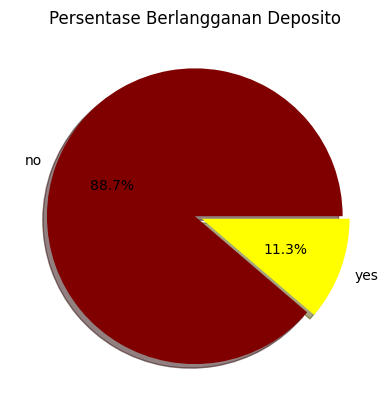

In [30]:
colors = ['#800000', '#FFFF00'] 
bank_df['berlangganan_deposito'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0, 0.05],
    cmap='cool',
    shadow=True,
    colors=colors,
)
plt.title('Persentase Berlangganan Deposito')
plt.ylabel('')
plt.show()

### Menampilkan histogram jumlah masing-masing kelas pada label "Berlangganan Deposito" dengan matplotlib.

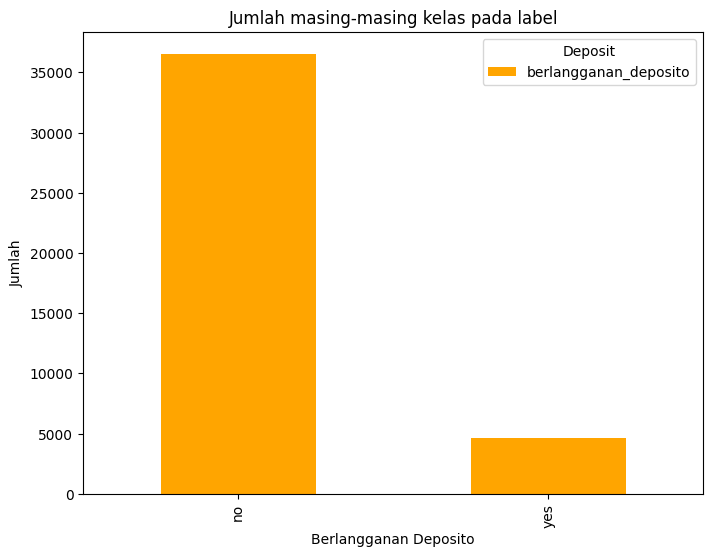

In [31]:
plt.figure(figsize=(8, 6))
bank_df['berlangganan_deposito'].value_counts().plot(
    kind='bar',
    color='#FFA500',
)
plt.title('Jumlah masing-masing kelas pada label')
plt.ylabel('Jumlah')
plt.xlabel('Berlangganan Deposito')
plt.legend(title='Deposit')
plt.show()

### Menampilkan pie chart dan countplot pernikahan dalam subplot.

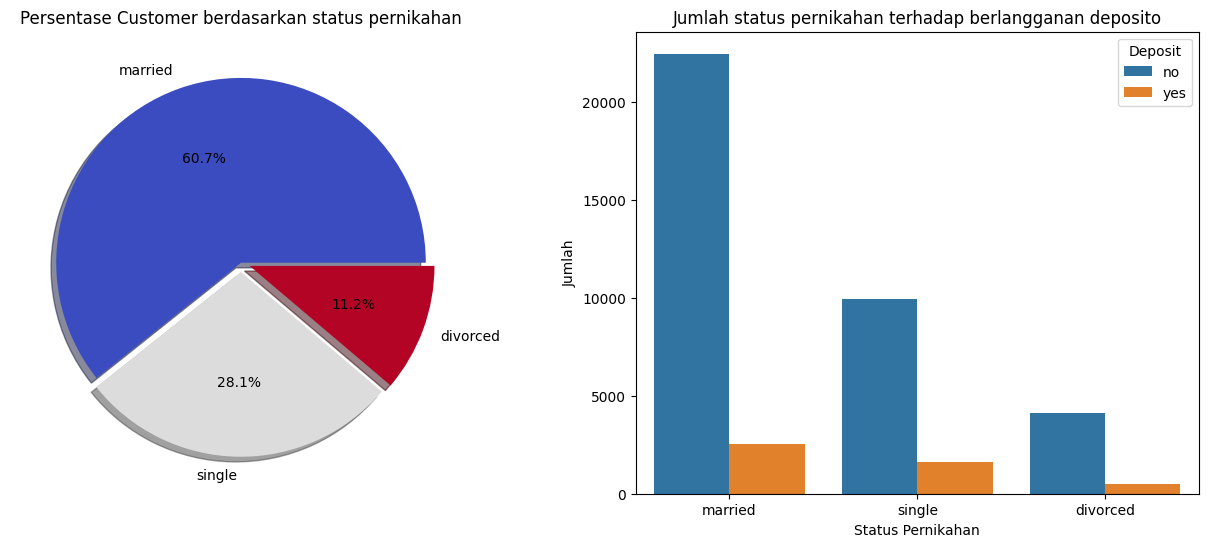

In [32]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
bank_df['pernikahan'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05,0.05], 
    cmap='coolwarm',
    shadow=True,
)
ax[0].set_title('Persentase Customer berdasarkan status pernikahan')
ax[0].set_ylabel('')
sns.countplot(
    x='pernikahan',
    hue='berlangganan_deposito',
    data=bank_df
)
ax[1].set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Pernikahan')
ax[1].legend(title='Deposit')

### Mengidentifikasi kolom-kolom numerik dan kategorikal dalam DataFrame "bank_df".

In [33]:
numerical_columns = list(bank_df.select_dtypes(include=['int64']).columns.values) + list(bank_df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(bank_df.select_dtypes(include=['object']))

### Memisahkan kolom-kolom kategorikal dalam "bank_df" menjadi nominal dan ordinal.

In [34]:
nominal_columns = ['pekerjaan', 'pendidikan', 'alat_komunikasi', 'kontak_terakhir_bulan', 'kontak_terakhir_hari', 'luaran_marketing_sebelumnya']
ordinal_columns = [col for col in categorical_columns if col not in nominal_columns]

### Menggunakan one-hot encoding untuk transformasi kolom nominal.

In [35]:
ohe_bank_df = pd.get_dummies(bank_df[nominal_columns], columns=nominal_columns, prefix=nominal_columns)

### Menerapkan LabelEncoder pada kolom ordinal dalam DataFrame bank_df.

In [36]:
le_bank_df = bank_df.loc[:,ordinal_columns]
encoder = LabelEncoder()

for ord_col in ordinal_columns:
    le_bank_df[ord_col] = encoder.fit_transform(le_bank_df[ord_col])

### Menggabungkan hasil one-hot encoding dan label encoding pada bank_df.

In [37]:
bank_df_categorical_encoded = pd.concat([ohe_bank_df,le_bank_df],axis=1)

### Menampilkan data top 5

In [38]:
bank_df_categorical_encoded.head()

,pekerjaan_admin.,pekerjaan_blue-collar,pekerjaan_entrepreneur,pekerjaan_housemaid,pekerjaan_management,pekerjaan_retired,pekerjaan_self-employed,pekerjaan_services,pekerjaan_student,pekerjaan_technician,...,kontak_terakhir_hari_tue,kontak_terakhir_hari_wed,luaran_marketing_sebelumnya_failure,luaran_marketing_sebelumnya_nonexistent,luaran_marketing_sebelumnya_success,pernikahan,kredit_default,pinjaman_rumah,pinjaman_pribadi,berlangganan_deposito
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


### Menghilangkan target dan memilih fitur kategori menggunakan SelectKBest chi2.

In [39]:
ec_categorical_columns = list(bank_df_categorical_encoded.columns)
ec_categorical_columns.remove('berlangganan_deposito')

X_categorical = bank_df_categorical_encoded.drop('berlangganan_deposito',axis=1)
y_categorical = bank_df_categorical_encoded['berlangganan_deposito']

chi_square_fs = SelectKBest(score_func=chi2,k='all')

X_categorical_selected = chi_square_fs.fit_transform(X_categorical,y_categorical)

### Visualisasi grafik batang untuk pentingnya fitur kategorikal menggunakan chi-squared.

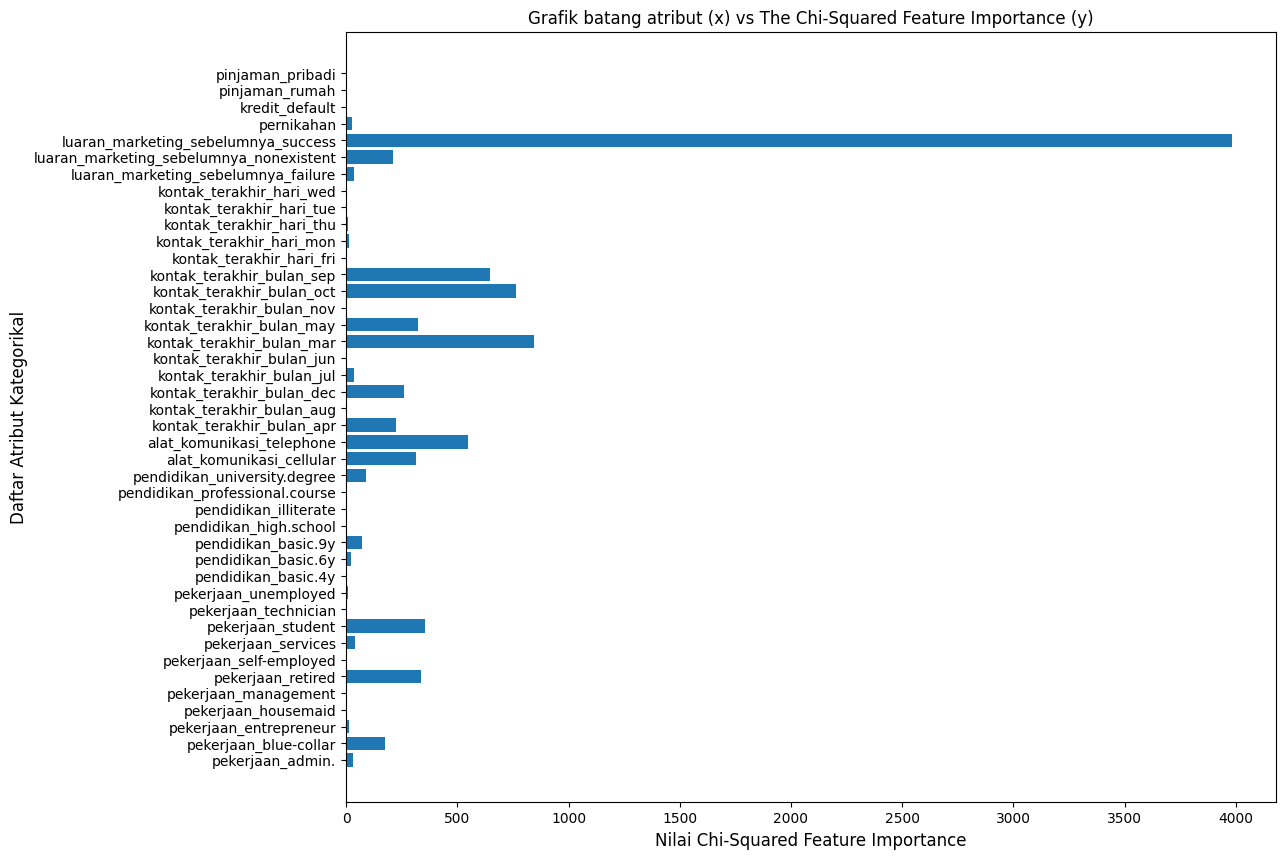

In [40]:
plt.figure(figsize=(12,10))
plt.barh([cat_col for cat_col in ec_categorical_columns], chi_square_fs.scores_)
plt.ylabel('Daftar Atribut Kategorikal', fontsize=12)
plt.xlabel('Nilai Chi-Squared Feature Importance', fontsize=12)
plt.title('Grafik batang atribut (x) vs The Chi-Squared Feature Importance (y)',fontsize=12)
plt.show()

### Memilih fitur numerik dengan ANOVA (f_classif) menggunakan SelectKBest.

In [41]:
X_numerical = bank_df[numerical_columns].copy(deep=True)
y_numerical = y_categorical.copy(deep=True)
anova_fs = SelectKBest(score_func=f_classif,k='all')
X_numerical_selected = anova_fs.fit_transform(X_numerical,y_numerical)

### Visualisasi grafik batang pentingnya fitur numerikal menggunakan ANOVA F-measure.

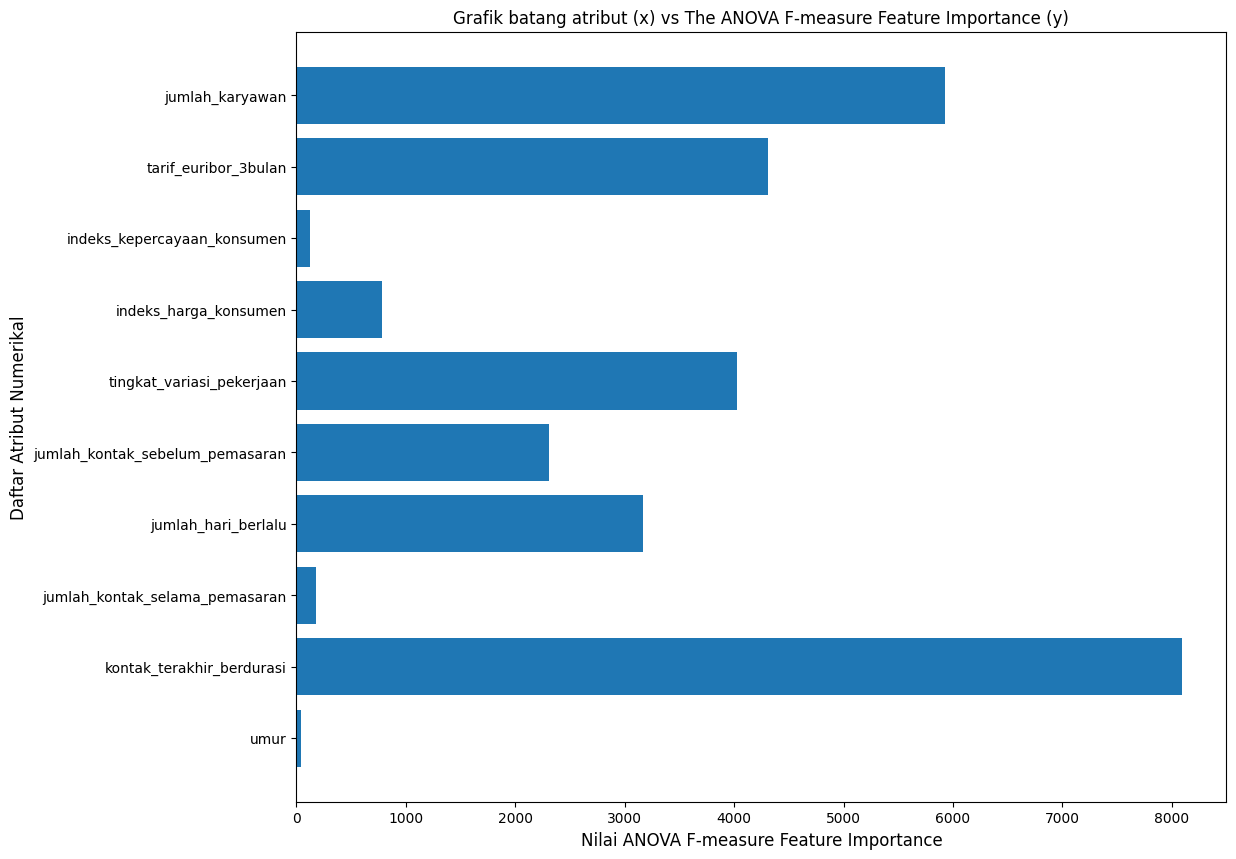

In [42]:
plt.figure(figsize=(12,10))
plt.barh([num_col for num_col in list(X_numerical.columns)], anova_fs.scores_)
plt.ylabel('Daftar Atribut Numerikal', fontsize=12)
plt.xlabel('Nilai ANOVA F-measure Feature Importance', fontsize=12)
plt.title('Grafik batang atribut (x) vs The ANOVA F-measure Feature Importance (y)',fontsize=12)
plt.show()

### Gabungkan data numerik dan kategorikal dalam bank_df.





In [43]:
bank_df = pd.concat([bank_df[numerical_columns],bank_df_categorical_encoded],axis=1)

### Pisahkan variabel independen dan dependen bank_df.





In [44]:
X = bank_df.drop('berlangganan_deposito',axis=1)
y = bank_df['berlangganan_deposito']

### Membagi data menjadi train dan test set.





In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Menampilkan dimensi atribut dan target untuk data latih dan data uji.

In [46]:
print("Dimensi atribut data latih = ", X_train.shape)
print("Dimensi target data latih = ", y_train.shape)
print("Dimensi atribut data uji = ", X_test.shape)
print("Dimensi target data uji = ", y_test.shape)

Dimensi atribut data latih =  (32950, 52)
Dimensi target data latih =  (32950,)
Dimensi atribut data uji =  (8238, 52)
Dimensi target data uji =  (8238,)


### Melakukan penskalaan standar (standard scaling) pada data latih dan data uji.

In [47]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

### Melakukan analisis komponen utama (principal component analysis / PCA) pada data latih.

In [48]:
pca_ = PCA()
pca_.fit(X_train)

PCA()

### Menampilkan nilai eigen untuk setiap principal component.

In [49]:
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print("="*30)

Nilai Eigen setiap Principal Component
[5.74701231e+00 2.71512564e+00 2.32583653e+00 2.09433778e+00
 1.89675996e+00 1.78991149e+00 1.66079940e+00 1.58935610e+00
 1.54481157e+00 1.28677371e+00 1.27050970e+00 1.25381281e+00
 1.22917215e+00 1.20799959e+00 1.19301275e+00 1.14804398e+00
 1.10930860e+00 1.09731135e+00 1.06246717e+00 1.05710484e+00
 1.04154046e+00 1.03330854e+00 1.02690037e+00 1.02328728e+00
 1.00738458e+00 1.00161921e+00 9.89602848e-01 9.86621099e-01
 9.71839713e-01 9.53014337e-01 9.36041674e-01 8.82722654e-01
 8.54224232e-01 7.91167234e-01 7.33439954e-01 7.13300933e-01
 6.11026662e-01 4.47316288e-01 4.29101035e-01 4.13263959e-01
 2.84698159e-01 2.39626000e-01 2.22765162e-01 1.22280361e-01
 3.93430633e-03 2.08367670e-03 1.13339833e-30 1.72437947e-31
 7.30737469e-32 5.80580196e-32 5.04293974e-32 1.32296216e-32]


### Menampilkan rasio dari nilai eigen untuk setiap principal component.

In [50]:
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print("="*30)

Rasio Nilai Eigen setiap Principal Component
[1.10516113e-01 5.22123700e-02 4.47262681e-02 4.02745043e-02
 3.64750461e-02 3.44203302e-02 3.19374807e-02 3.05636128e-02
 2.97070133e-02 2.47448973e-02 2.44321374e-02 2.41110531e-02
 2.36372086e-02 2.32300564e-02 2.29418566e-02 2.20770988e-02
 2.13322103e-02 2.11015010e-02 2.04314409e-02 2.03283224e-02
 2.00290163e-02 1.98707149e-02 1.97474848e-02 1.96780044e-02
 1.93721925e-02 1.92613233e-02 1.90302464e-02 1.89729069e-02
 1.86886580e-02 1.83266426e-02 1.80002551e-02 1.69749205e-02
 1.64268905e-02 1.52142928e-02 1.41041864e-02 1.37169093e-02
 1.17501561e-02 8.60197525e-03 8.25169253e-03 7.94714263e-03
 5.47479844e-03 4.60805245e-03 4.28381542e-03 2.35147403e-03
 7.56574408e-05 4.00694896e-05 2.17954603e-32 3.31601373e-33
 1.40522172e-33 1.11646649e-33 9.69766672e-34 2.54408078e-34]


### Membuat data frame PCA variance, mengurutkan, dan memberi nama komponen utama.

In [ ]:
pca_variance = pd.DataFrame(data=pca_.explained_variance_ratio_,columns=['PC Variance'])
pca_variance['pc_name'] = pd.Series(data=['PC-'+str(i+1) for i in range(0,X_train.shape[1])])
pca_variance = pca_variance.sort_values(by='PC Variance')

### Visualisasi bar plot rasio variance tiap PC pada data latih.

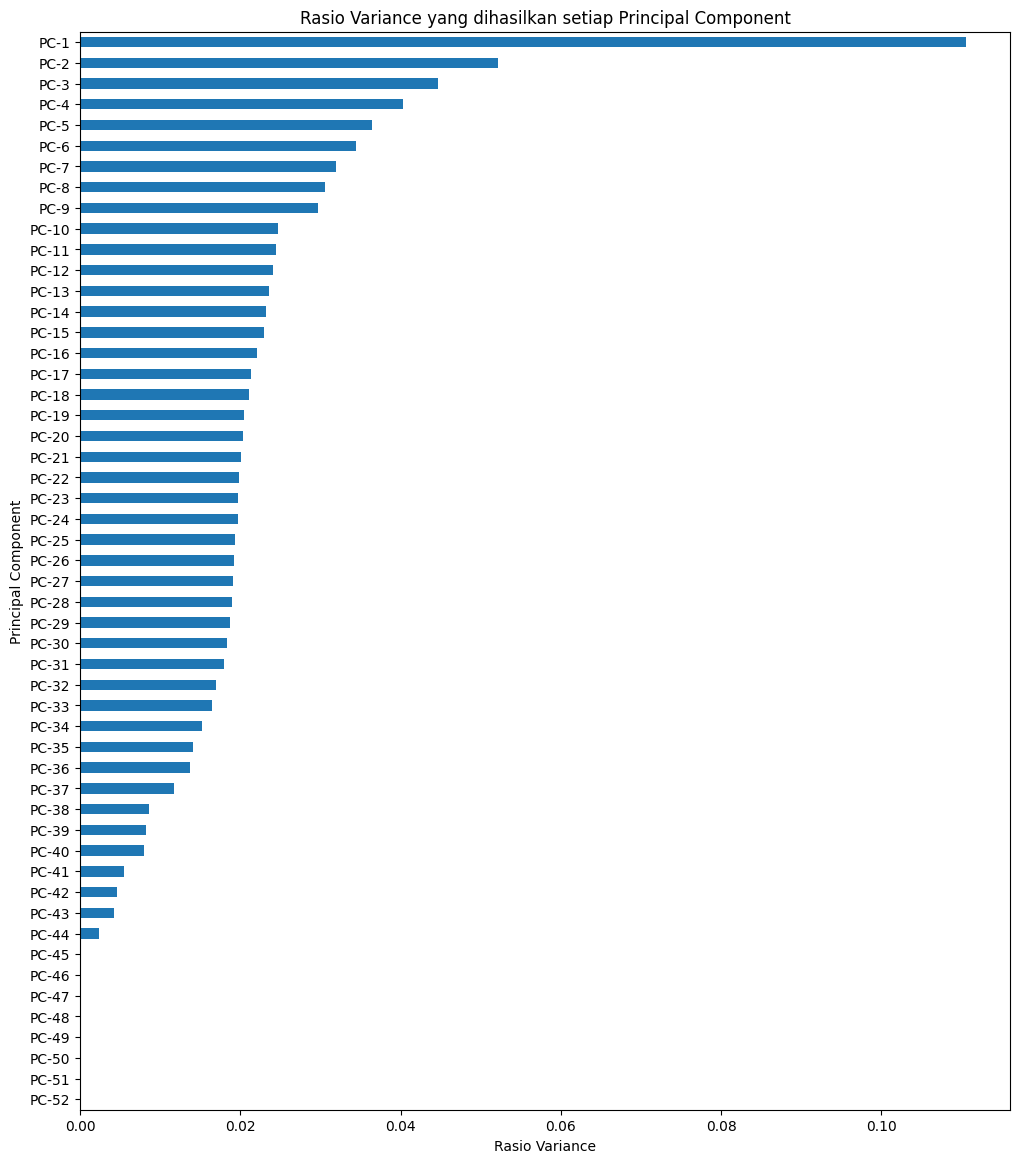

In [51]:
plt.figure(figsize=(12,14))
pca_variance['PC Variance'].plot(kind='barh')
plt.yticks(ticks=range(0,X_train.shape[1]), labels=pca_variance['pc_name'])
plt.title('Rasio Variance yang dihasilkan setiap Principal Component')
plt.xlabel('Rasio Variance')
plt.ylabel('Principal Component')
plt.show()

### Mencari jumlah PC terbaik, syarat nilai eigen >=1.

In [52]:
def find_best_n_components(pca):   
    n_best_component = 0
    for i in range(0,len(pca.explained_variance_)):
        if pca.explained_variance_[i]>=1:
            n_best_component+=1
    
    return n_best_component

### Menampilkan informasi jumlah PC terbaik dan kehilangan informasi.

In [53]:
n_components = find_best_n_components(pca_)
print('Jumlah n Principal Component terbaik = {} komponen'.format(n_components))
print('Informasi yang dijelaskan oleh {} komponen = {} %'.format(n_components,(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))
print('Kehilangan Informasi = {} %'.format(100-(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))

Jumlah n Principal Component terbaik = 26 komponen
Informasi yang dijelaskan oleh 26 komponen = 77.715925765146 %
Kehilangan Informasi = 22.284074234854003 %


### Menerapkan PCA dengan jumlah PC terbaik pada data latih dan uji.

In [54]:
pca_ = PCA(n_components=n_components)
pca_.fit(X_train)
X_train_pca = pca_.transform(X_train)
X_test_pca = pca_.transform(X_test)

### Konversi hasil PCA ke DataFrame dengan kolom target.

In [55]:
train_pca_df = pd.DataFrame(data=X_train_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
train_pca_df['target'] = y_train.to_numpy()
test_pca_df = pd.DataFrame(data=X_test_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
test_pca_df['target'] = y_test.to_numpy()

### Menampilkan 5 data teratas dari dataframe hasil transformasi PCA pada data latih.

In [56]:
train_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,target
0,-2.429896,1.090716,-1.419508,0.861514,1.649724,-0.306433,-1.347143,0.763991,-0.253051,0.818660,...,-0.263373,-0.464745,0.266443,-0.358134,-0.064702,-0.110684,0.022834,-0.483916,0.050402,0
1,1.789152,-0.721039,-0.933380,-1.524215,-1.753419,-1.114211,-0.523343,0.075481,-0.672748,0.797386,...,0.590200,-0.151735,0.132620,0.053649,-0.997133,0.524077,0.623786,0.267233,-0.236567,0
2,4.002437,1.843546,-0.365711,3.645592,-0.146599,-1.149233,1.524353,-2.390155,0.142388,1.733644,...,-0.867647,-0.104023,0.652257,0.198062,-1.119809,-0.408431,0.742664,0.091494,-0.374369,0
3,-1.589423,-0.941957,-0.949450,2.350778,2.015033,-0.906969,0.409446,0.472135,0.339237,-0.662028,...,2.070358,0.615548,0.281539,-0.592390,0.553827,0.898684,0.468857,-0.143406,0.684554,0
4,-1.776371,1.183920,0.622895,-2.095307,-0.711335,-0.190918,1.105052,0.719406,0.573174,-0.180458,...,0.712395,-0.391292,-0.353649,-0.475383,-0.912696,-0.035102,0.175259,0.245487,-0.622731,0


### Menampilkan 5 data teratas dari target pada data latih.

In [57]:
y_train.head()

12556    0
35451    0
30592    0
17914    0
3315     0
Name: berlangganan_deposito, dtype: int64

### Menampilkan 5 data teratas dari dataframe hasil transformasi PCA pada data uji.

In [58]:
test_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,target
0,4.000396,1.012343,-0.730603,0.094904,0.583200,1.299810,1.433577,-2.594254,0.834249,0.896387,...,-0.063027,-0.521970,-0.526443,-0.685875,0.455135,-0.472595,-0.768723,-0.013853,0.296277,0
1,-1.712449,0.627720,1.459371,-0.625624,-1.626634,-1.183675,-0.406510,-0.312352,0.190115,-0.524182,...,0.712094,-0.104989,0.318448,-0.219514,-0.034335,-0.070543,-0.194350,-0.075262,-0.220217,0
2,3.775669,2.293744,-2.392280,0.383326,0.733485,0.496271,-1.631511,-1.150818,2.440765,1.969379,...,-0.364272,0.180243,-0.331113,-0.499275,-0.707738,0.021830,0.804342,0.125527,-0.277766,0
3,-2.708686,1.491463,0.999386,-1.956873,0.545894,-0.920020,1.144973,-0.847891,-0.963275,1.891290,...,0.250851,-0.152843,-0.587999,-0.374059,-0.464365,-0.058984,0.084218,0.519016,-0.643608,0
4,-1.330193,-1.204343,-0.824009,0.038500,2.072576,-0.598560,1.825449,0.522222,-0.049089,1.076635,...,2.426386,-0.361359,-0.018458,-0.652254,-0.262069,0.920641,-0.445293,-0.192239,0.332886,0


### Menampilkan 5 data teratas dari target atau label pada data uji.

In [59]:
y_test.head()

32884    0
3169     0
32206    0
9403     0
14020    0
Name: berlangganan_deposito, dtype: int64

### Mendefinisikan model klasifikasi, metrik evaluasi, dan konfigurasi cross-validation.

In [60]:
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

### Fungsi evaluasi model cross-validation dengan metrik evaluasi yang ditentukan.

In [88]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    cv_results = []
    model_names = []
    print_msg = []
    for model_name, model in models:
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)
        cv_results.append(cv_result)
        model_names.append(model_name)
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    return cv_results,model_names,print_msg

### Hasil cross-validation menggunakan model-model dengan metrik akurasi.

In [62]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

### Manampilkan pesan hasil cross-validation untuk akurasi.

In [63]:
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.9017602427921092  std accuracy = 0.0037955685470222474
K-Nearest Neighbor: mean accuracy = 0.8962974203338392  std accuracy = 0.00483502746744191
Support Vector Machine: mean accuracy = 0.9058270106221548  std accuracy = 0.0036013168275525263
Decision Tree: mean accuracy = 0.8756904400606981  std accuracy = 0.005454723384196907
Random Forest: mean accuracy = 0.9028831562974202  std accuracy = 0.005193141034587537
Naive Bayes: mean accuracy = 0.8832169954476481  std accuracy = 0.005261507237091179


### Menampilkan boxplot hasil perbandingan akurasi model klasifikasi.

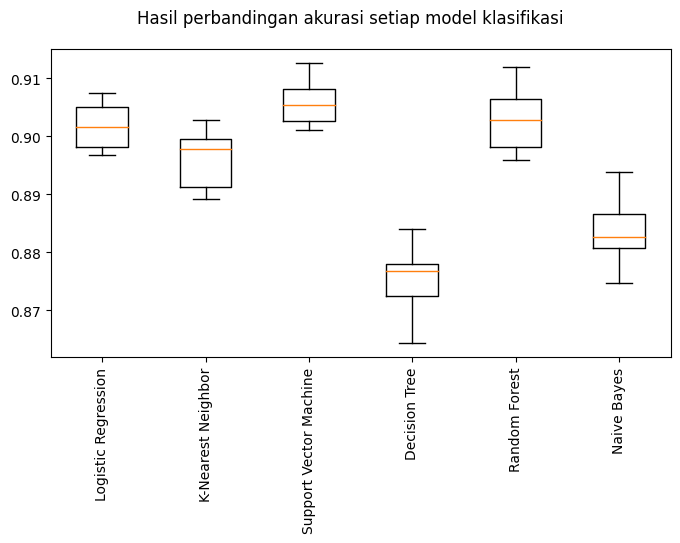

In [64]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

### Latih SVM pada data PCA, prediksi data uji.

In [91]:
svm = SVC()
svm.fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)

### Menampilkan skor recall SVM pada data uji.

In [89]:
print("SVM Recall score = ", metrics.recall_score(y_test,y_pred))

SVM Recall score =  0.3315508021390374


### Manampilkan laporan klasifikasi untuk data uji.

In [90]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.64      0.33      0.44       935

    accuracy                           0.90      8238
   macro avg       0.78      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238



### Manampilkan confusion matriks  untuk data uji.

In [92]:
print(metrics.confusion_matrix(y_test,y_pred))

[[7130  173]
 [ 625  310]]


### Lakukan evaluasi model dengan metrik Recall menggunakan validasi silang.

In [67]:
cv_results_recall, model_names, print_msg_recall = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_recall
)

### Menampilkan pesan hasil evaluasi metrik Recall untuk setiap model.

In [68]:
for msg in print_msg_recall:
    print(msg)

Logistic Regression: mean recall = 0.3020489619715744  std recall = 0.023117944290829185
K-Nearest Neighbor: mean recall = 0.3140819439874017  std recall = 0.025776132271290254
Support Vector Machine: mean recall = 0.33272598614379056  std recall = 0.017748882250414287
Decision Tree: mean recall = 0.4574263722525641  std recall = 0.018802955675785334
Random Forest: mean recall = 0.3716957663626901  std recall = 0.03410028353838658
Naive Bayes: mean recall = 0.4048435214580879  std recall = 0.031015599334493705


### Tampilkan diagram boxplot perbandingan Recall untuk setiap model klasifikasi.

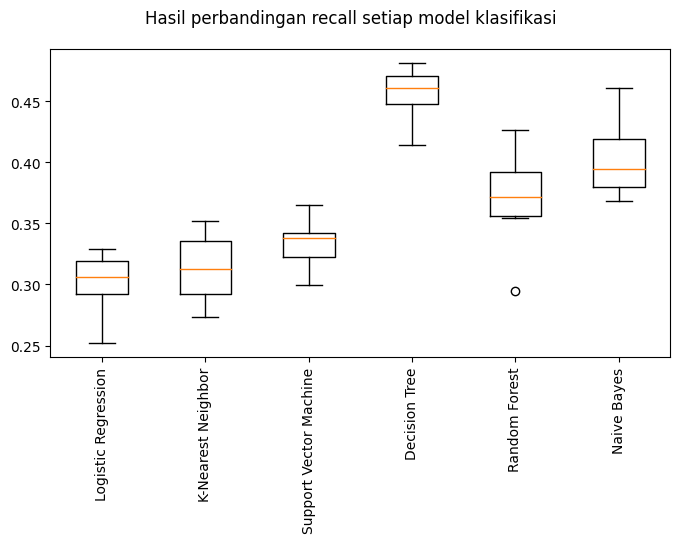

In [69]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan recall setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_recall)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

### Menggunakan model Decision Tree untuk klasifikasi, latih dan prediksi.

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train_pca,y_train)
y_pred_dt = dt.predict(X_test_pca)

### Menampilkan akurasi Decision Tree pada data prediksi menggunakan metrik accuracy.

In [93]:
print("Accuracy score Decision Tree = ", metrics.accuracy_score(y_test,y_pred_dt))

Accuracy score Decision Tree =  0.8743627093954843


### Menampilkan laporan klasifikasi Decision Tree menggunakan metrik default.

In [94]:
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.45      0.45      0.45       935

    accuracy                           0.87      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.87      0.87      0.87      8238



### Menampilkan confusion matriks untuk prediksi Decision Tree.

In [95]:
print(metrics.confusion_matrix(y_test,y_pred_dt))

[[6782  521]
 [ 514  421]]


### Gabungkan data latih dengan hasil klasifikasi target.

In [72]:
df = pd.concat([pd.DataFrame(data=X_train_pca),y_train.reset_index()['berlangganan_deposito']],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,berlangganan_deposito
0,-2.429896,1.090716,-1.419508,0.861514,1.649724,-0.306433,-1.347143,0.763991,-0.253051,0.818660,...,-0.263373,-0.464745,0.266443,-0.358134,-0.064702,-0.110684,0.022834,-0.483916,0.050402,0
1,1.789152,-0.721039,-0.933380,-1.524215,-1.753419,-1.114211,-0.523343,0.075481,-0.672748,0.797386,...,0.590200,-0.151735,0.132620,0.053649,-0.997133,0.524077,0.623786,0.267233,-0.236567,0
2,4.002437,1.843546,-0.365711,3.645592,-0.146599,-1.149233,1.524353,-2.390155,0.142388,1.733644,...,-0.867647,-0.104023,0.652257,0.198062,-1.119809,-0.408431,0.742664,0.091494,-0.374369,0
3,-1.589423,-0.941957,-0.949450,2.350778,2.015033,-0.906969,0.409446,0.472135,0.339237,-0.662028,...,2.070358,0.615548,0.281539,-0.592390,0.553827,0.898684,0.468857,-0.143406,0.684554,0
4,-1.776371,1.183920,0.622895,-2.095307,-0.711335,-0.190918,1.105052,0.719406,0.573174,-0.180458,...,0.712395,-0.391292,-0.353649,-0.475383,-0.912696,-0.035102,0.175259,0.245487,-0.622731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.711670,1.537672,1.625826,2.615817,-1.685121,1.207826,1.695352,-0.672781,-0.537595,-1.508368,...,-0.784486,-0.427396,-0.639197,-0.078460,-0.375603,-0.485109,0.017872,0.575362,-0.631741,0
32946,-2.557405,0.826067,1.508364,-0.994545,-0.132819,-1.462598,-1.664621,-1.770730,-1.641342,-1.703184,...,-1.730398,0.750486,-0.529021,-1.495449,-0.310442,-0.289549,0.583140,-0.046543,0.059369,0
32947,6.351784,1.236208,4.565268,-0.248194,0.626077,-0.195482,1.586189,3.829335,-0.229396,-0.349198,...,0.401952,-2.054907,0.439717,-0.094342,-3.390683,-1.902794,-0.992704,-1.117758,3.145932,1
32948,-1.784939,0.855432,1.307278,-0.678610,-1.743400,-0.917696,-1.170868,-0.755026,0.882698,-2.162670,...,-1.276038,0.974476,0.101674,-1.187313,0.264834,-0.301546,0.381622,-0.306947,0.713608,0


### Gabungkan data latih dengan hasil klasifikasi target.

In [73]:
df['berlangganan_deposito'].value_counts()

0    29245
1     3705
Name: berlangganan_deposito, dtype: int64

### Buat dua dataframe, no_df dan yes_df, dari data latih berdasarkan klasifikasi target.

In [74]:
no_df = df[df['berlangganan_deposito']==0][:df['berlangganan_deposito'].value_counts()[1]]
yes_df = df[df['berlangganan_deposito']==1]

### Gabung yes_df dan no_df jadi normal_distributed_df, acak, dan tampilkan 5 baris teratas.

In [75]:
normal_distributed_df = pd.concat([yes_df,no_df])
bank_df_normal_distributed = normal_distributed_df.sample(frac=1, random_state=42)
bank_df_normal_distributed.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,berlangganan_deposito
1481,-0.737405,-3.154685,1.293300,-0.214968,-0.427613,1.566377,-1.050426,0.405100,0.430031,0.301603,...,-0.406099,0.459797,0.000490,0.127136,0.085681,-0.222761,0.389542,-0.472315,0.106185,0
13735,-1.228064,-1.350754,-0.470728,-0.435871,2.132521,-1.296898,1.744584,1.105626,0.131299,-1.412596,...,0.387737,-1.019518,-3.528386,-1.590710,-0.143519,0.797727,-1.343163,1.819567,-1.040653,1
21627,1.941218,-0.778695,-1.080837,-1.069322,-1.672651,-1.081161,-0.508387,0.481940,-0.632963,-1.356784,...,1.233829,-0.253930,-1.275877,-0.817438,0.249004,0.442914,-0.899139,0.597687,-0.527616,1
2286,1.567383,0.702001,-2.588303,0.337360,-0.811919,-0.033619,0.996437,0.835583,-0.005238,-0.771813,...,0.171965,0.425920,-0.151821,-0.219412,-0.867090,0.266884,0.699826,0.189979,-0.625757,0
22685,5.712404,0.028923,3.905195,-0.381346,0.755062,-1.013254,-0.775753,1.362299,0.865929,-1.726545,...,2.189060,0.275779,0.122739,0.325616,0.112845,-0.442153,-0.232763,-0.066920,-0.430516,1


### X_train_balanced = fitur-fitur dari normal_distributed_df
### y_train_balanced = nilai pada kolom 'berlangganan_deposito' dari normal_distributed_df.

In [76]:
X_train_balanced = bank_df_normal_distributed.drop('berlangganan_deposito',axis=1)
y_train_balanced = bank_df_normal_distributed['berlangganan_deposito']

### Menampilkan distribusi kelas pada subsampel dataset

In [96]:
print('Distribusi setiap kelas dari subsampel dataset')

Distribusi setiap kelas dari subsampel dataset


### Menampilkan distribusi proporsi kelas dalam persentase pada subsampel dataset.

In [97]:
print(bank_df_normal_distributed['berlangganan_deposito'].value_counts()/len(bank_df_normal_distributed))

0    0.5
1    0.5
Name: berlangganan_deposito, dtype: float64


### Visualisasi Plot distribusi kelas yang seimbang dalam diagram batang.

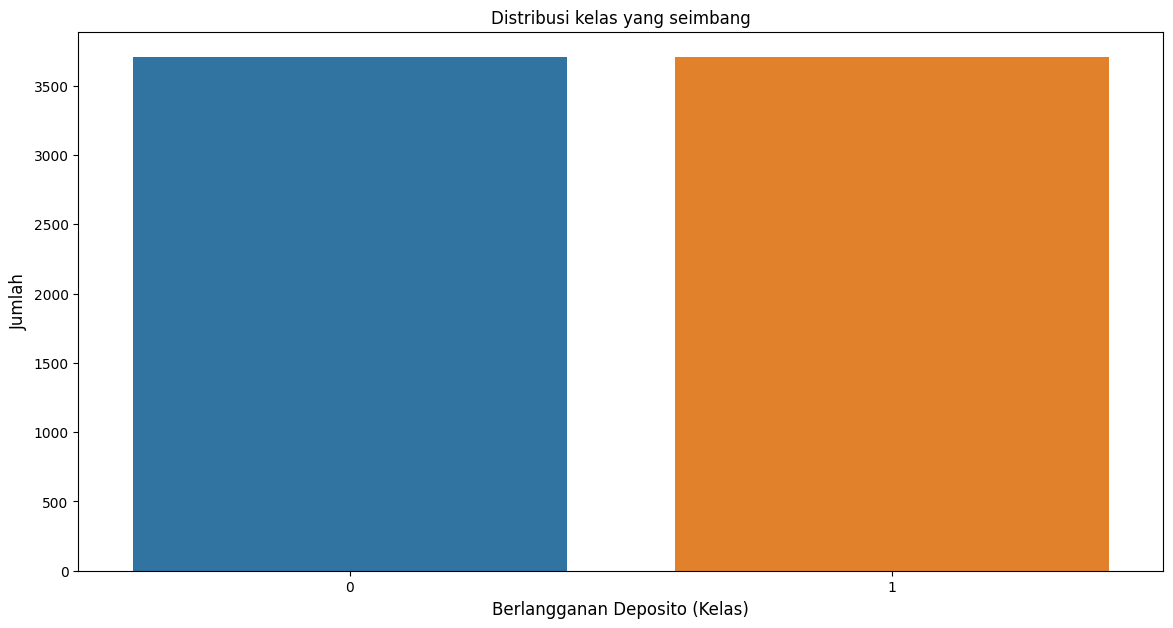

In [78]:
plt.figure(figsize=(14,7))
sns.countplot(x='berlangganan_deposito', data=bank_df_normal_distributed)
plt.title('Distribusi kelas yang seimbang', fontsize=12)
plt.xlabel('Berlangganan Deposito (Kelas)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

### Melakukan evaluasi model dengan akurasi pada dataset yang seimbang.

In [79]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    kfold=kfold,
    scoring=scoring_accuracy
)

### Menampilkan hasil evaluasi model 

In [80]:
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.8330634278002698  std accuracy = 0.01099761550978641
K-Nearest Neighbor: mean accuracy = 0.7794871794871795  std accuracy = 0.011860497998769138
Support Vector Machine: mean accuracy = 0.8701754385964913  std accuracy = 0.012842512554245955
Decision Tree: mean accuracy = 0.7834008097165992  std accuracy = 0.01088442377944895
Random Forest: mean accuracy = 0.858029689608637  std accuracy = 0.01343847696032885
Naive Bayes: mean accuracy = 0.7091767881241564  std accuracy = 0.018258565702334913


### Visualisasi boxplot perbandingan akurasi model klasifikasi pada subsampel seimbang.

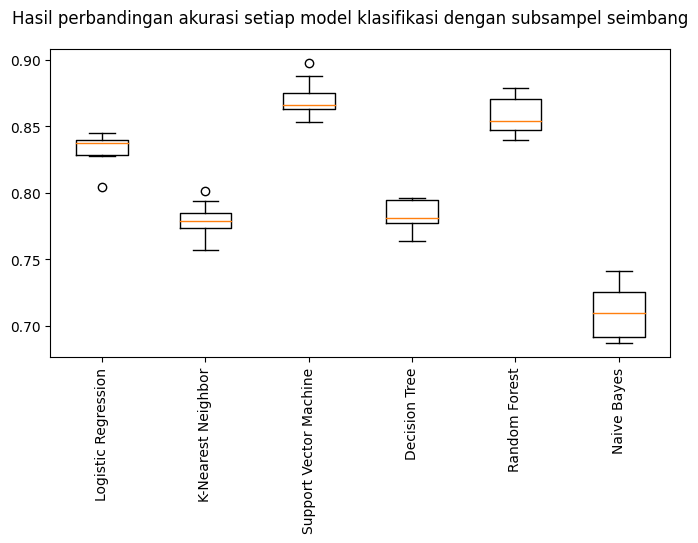

In [81]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi dengan subsampel seimbang')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

### Melakukan pemodelan SVM pada subsampel seimbang dan melakukan prediksi.

In [82]:
svm_balanced = SVC()
svm_balanced.fit(X_train_balanced,y_train_balanced)
y_pred_balanced = svm_balanced.predict(X_test_pca)

### Menampilkan akurasi SVM pada subsampel seimbang dalam persentase.

In [98]:
print("Accuracy score SVM with balanced subsample = ", metrics.accuracy_score(y_test,y_pred_balanced)," %")

Accuracy score SVM with balanced subsample =  0.8417091527069677  %


### Menampilkan matriks konfusi SVM pada subsampel seimbang.

In [99]:
print(metrics.confusion_matrix(y_test,y_pred_balanced))

[[6074 1229]
 [  75  860]]


### Menampilkan laporan klasifikasi SVM pada subsampel seimbang.

In [100]:
print(metrics.classification_report(y_test,y_pred_balanced))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7303
           1       0.41      0.92      0.57       935

    accuracy                           0.84      8238
   macro avg       0.70      0.88      0.74      8238
weighted avg       0.92      0.84      0.87      8238



### Melakukan tuning hyperparameter SVM menggunakan GridSearchCV.

In [84]:
svm_params_tuned = SVC()
kfold = kfold
params_grid={
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma':['scale','auto'],
}

grid_svm = GridSearchCV(
    estimator= svm_params_tuned,
    param_grid=params_grid,
    scoring=scoring_accuracy,
    cv = kfold
)

grid_results_ = grid_svm.fit(X_train_balanced,y_train_balanced)

### Menampilkan hasil hyperparameter terbaik dan akurasi terbaik SVM.

In [101]:
print('Best SVM Hyperparameter: {}'.format(grid_results_.best_params_))
print('Best SVM Accuracy Score: {}'.format(grid_results_.best_score_))

Best SVM Hyperparameter: {'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy Score: 0.8701754385964913


### Melatih model SVM dengan hyperparameter terbaik dan membuat prediksi.

In [86]:
svm_final = SVC(gamma=grid_results_.best_params_['gamma'],kernel=grid_results_.best_params_['kernel'])
svm_final.fit(X_train_balanced,y_train_balanced)
y_pred_final = svm_final.predict(X_test_pca)

### Menampilkan akurasi model SVM terakhir dalam persentase.

In [102]:
print("Accuracy score Final Model SVM = ", metrics.accuracy_score(y_test,y_pred_final)," %")

Accuracy score Final Model SVM =  0.8417091527069677  %


### Menampilkan matriks konfusi hasil prediksi model SVM terakhir.

In [103]:
print(metrics.confusion_matrix(y_test,y_pred_final))

[[6074 1229]
 [  75  860]]


### Menampilkan laporan klasifikasi hasil prediksi model SVM terakhir.

In [104]:
print(metrics.classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7303
           1       0.41      0.92      0.57       935

    accuracy                           0.84      8238
   macro avg       0.70      0.88      0.74      8238
weighted avg       0.92      0.84      0.87      8238

